In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({"Nome": ["Joao", "maria"], "IDADE": [10, 12]})

In [3]:
df

,Nome,IDADE
0,Joao,10
1,maria,12


### Convertendo os labels das colunas para minusculo


In [4]:
df_lower = df.rename(columns=str.lower)
display(df_lower)
display(df)

,nome,idade
0,Joao,10
1,maria,12


,Nome,IDADE
0,Joao,10
1,maria,12


In [5]:
def turn_in_lower_case(column_label: str) -> str:
    return column_label.lower()

df_lower_personalized = df.rename(columns=turn_in_lower_case)
display(df_lower_personalized)
display(df)

,nome,idade
0,Joao,10
1,maria,12


,Nome,IDADE
0,Joao,10
1,maria,12


### Filtrando linhas e colunas

In [12]:
df_lower_personalized[(df_lower_personalized["nome"] == "maria") & (df_lower_personalized["idade"] == 12)]

,nome,idade
1,maria,12


### Pivot

In [3]:
df_location = pd.DataFrame({"location": ["BETR801", "FRST123"], "value": [10, 20]})
df_location

,location,value
0,BETR801,10
1,FRST123,20


In [4]:
df_location.pivot(columns="location", values="value")

location,BETR801,FRST123
0,10.0,NaN
1,NaN,20.0


<Axes: >

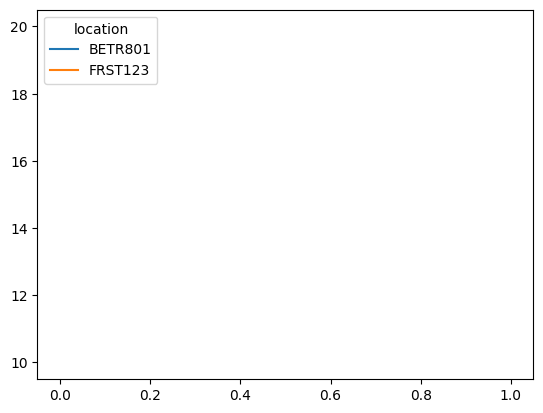

In [5]:
df_location.pivot(columns="location", values="value").plot()

In [11]:
df_location = pd.DataFrame({"location": ["BETR801", "FRST123"], "value": [10, 20]})

df_pivot = df_location.pivot(columns="location", values="value")
df_pivot

location,BETR801,FRST123
0,10.0,NaN
1,NaN,20.0


In [17]:
df_pivot.melt(value_vars=["BETR801", "FRST123"], value_name="value_personalized", ignore_index=False).dropna()

,location,value_personalized
0,BETR801,10.0
1,FRST123,20.0


### Dataframe a partir de dataclasses

In [18]:
from dataclasses import make_dataclass

In [21]:
Point = make_dataclass("Point",[("x", int), ("y", str)])
df_dataclasses = pd.DataFrame([Point(0, "10"),Point(0, "5"),Point(10, "20")])
df_dataclasses

,x,y
0,0,10
1,0,5
2,10,20


In [26]:
### Seleciona counas baseadas no tipo
import numpy as np
df_dataclasses.select_dtypes(include=[np.number])


,x
0,0
1,0
2,10


In [27]:
df_dataclasses.memory_usage()

Index    132
x         24
y         24
dtype: int64

In [31]:
df_dataclasses.astype({"y": "int64"}).dtypes

x    int64
y    int64
dtype: object

In [37]:
df_dataclasses.convert_dtypes()

,x,y
0,0,10
1,0,5
2,10,20


#### pd.DataFrame.at
Access a single value for a row/column pair by label.

#### DataFrame.iat
Access a single value for a row/column pair by integer position.

In [88]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  index=[4, 5, 6], columns=['A', 'B', 'C'])
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [89]:

### df.at[index_line, column_label]
print(df.at[5, 'B'])


4


In [90]:
def find_value(value: int, column: str) -> bool:
    column = column.lower()
    df.columns = [column.lower() for column in df.columns]
    return df[column] == value

# loc para filtrar, interessante
df.loc[find_value(30, 'c')]

,a,b,c
6,10,20,30


In [91]:
for column, content in df.items():
    print(column)
    print("*" * 100)
    print(print(type(content)))

a
****************************************************************************************************
<class 'pandas.core.series.Series'>
None
b
****************************************************************************************************
<class 'pandas.core.series.Series'>
None
c
****************************************************************************************************
<class 'pandas.core.series.Series'>
None


In [93]:
display(df.keys())
df_pop = df.copy()
# df_pop.pop("c")

Index(['a', 'b', 'c'], dtype='object')

In [94]:
df

,a,b,c
4,0,2,3
5,0,4,1
6,10,20,30


#### numpy.where

Replace values where the condition is False.

In [119]:
import pandas as pd
import numpy as np

# Criando um DataFrame de exemplo
df = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                   'B': [6, 7, 8, 9, 10]})

# Lista de condições usando np.where
conditions = {
    "elemento1": df["A"] > 2,
    "elemento2": df["B"] <= 6,
}

for label, condition in conditions.items():
    df[label] = np.where(condition, 1, 0)

df


,A,B,elemento1,elemento2
0,1,6,0,1
1,2,7,0,0
2,3,8,1,0
3,4,9,1,0
4,5,10,1,0
